In [2]:
import warnings
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import normalize
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from random import shuffle
from sklearn.preprocessing import MinMaxScaler

# from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [3]:
!pip install scikit-plot
from sklearn.metrics import confusion_matrix
import scikitplot as skplt

In [ ]:
pd.set_option("display.max_colwidth", -1)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
cd drive/MyDrive/

/content/drive/MyDrive


In [8]:

df=pd.read_csv('application_train.csv')


In [9]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.shape

(307511, 120)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 120 entries, TARGET to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(15)
memory usage: 281.5+ MB


In [1]:
# df.dtypes

Feature Analysis-Target

Very Few Applications had target 1 only 24k

In [8]:
df.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

Feature Analysis-Gender

In [9]:
# Females (200k) Applied for more loans than Men(100k) (Double)
grouper = df.groupby("CODE_GENDER")
sizes = grouper.size()
sizes

CODE_GENDER
F      202448
M      105059
XNA         4
dtype: int64

In [12]:
gender_perc = df[['CODE_GENDER', 'TARGET']].groupby(['CODE_GENDER'],as_index=False).mean()
gender_perc
#But males default on their loans more

,CODE_GENDER,TARGET
0,F,0.069993
1,M,0.101419
2,XNA,0.000000


<BarContainer object of 3 artists>

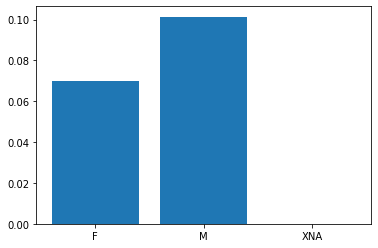

In [18]:
plt.bar(gender_perc['CODE_GENDER'],gender_perc['TARGET'])

In [32]:
#Get number of unique values of categorical columns
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)


NAME_CONTRACT_TYPE             2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

Analyse Name Contract Type

In [ ]:
df.NAME_CONTRACT_TYPE.unique()

array(['Cash loans', 'Revolving loans'], dtype=object)

In [ ]:
df.NAME_CONTRACT_TYPE.describe()

count     307511    
unique    2         
top       Cash loans
freq      278232    
Name: NAME_CONTRACT_TYPE, dtype: object

In [ ]:
cat_perc = df[['NAME_CONTRACT_TYPE', 'TARGET']].groupby(['NAME_CONTRACT_TYPE'],as_index=False).mean()


In [ ]:
cat_perc

,NAME_CONTRACT_TYPE,TARGET
0,0,0.054783
1,1,0.083459


Analyse AMT_INCOME_TOTAL

In [ ]:
df['AMT_INCOME_TOTAL'].head()

0    202500.0
1    270000.0
2    67500.0 
3    135000.0
4    121500.0
Name: AMT_INCOME_TOTAL, dtype: float64

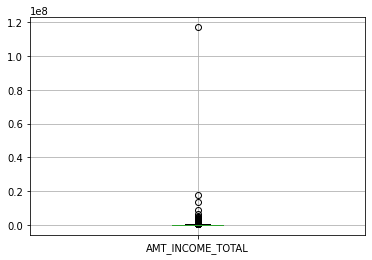

In [ ]:
df.boxplot(column="AMT_INCOME_TOTAL")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


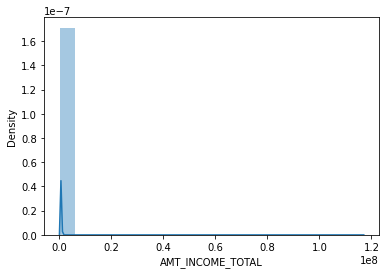

In [ ]:
import seaborn as sns
sns.distplot(df['AMT_INCOME_TOTAL'], bins = 20)

Analyse AMT_CREDIT

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


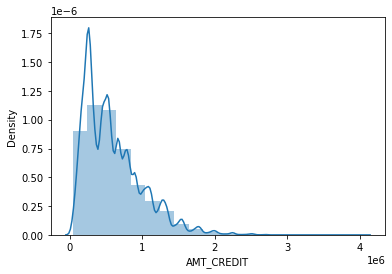

In [ ]:
sns.distplot(df['AMT_CREDIT'], bins = 20)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Index(['TARGET', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=108)

['NAME_TYPE_SUITE',
 'HOUSETYPE_MODE',
 'ORGANIZATION_TYPE',
 'NAME_HOUSING_TYPE',
 'FONDKAPREMONT_MODE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'WALLSMATERIAL_MODE',
 'NAME_FAMILY_STATUS',
 'EMERGENCYSTATE_MODE',
 'NAME_EDUCATION_TYPE',
 'NAME_INCOME_TYPE']

(307511, 239)

In [ ]:
df.EMERGENCYSTATE_MODE.unique()

array(['No', nan, 'Yes'], dtype=object)

In [ ]:
df.HOUSETYPE_MODE.unique()

array(['block of flats', nan, 'terraced house', 'specific housing'],
      dtype=object)

In [ ]:
#There are na values in categorical data as well
df.HOUSETYPE_MODE.fillna("Unknown")
df.EMERGENCYSTATE_MODE.fillna("Unknown")

Analyse Days Birth

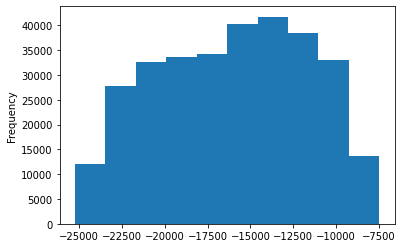

In [ ]:
df.DAYS_BIRTH.plot.hist()

Analyse days_employed

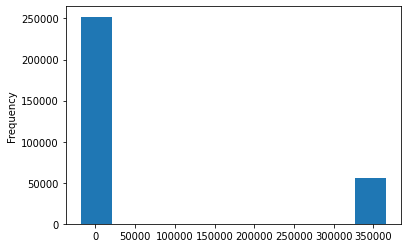

In [ ]:
df.DAYS_EMPLOYED.plot.hist()
#Most values are in 0 hist while some values are in 350k hist
#There is an anomaly

In [ ]:
df[df['DAYS_EMPLOYED']>300000]['TARGET'].mean()


0.05399646043269404

In [ ]:
df[df['DAYS_EMPLOYED']<300000]['TARGET'].mean()
#less number of anomaly has target 1(default loans less)
#more number of normal employed has target 1

0.0865997453765215

Find Correlation

In [38]:
correlation=df.corr()
correlation

,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
TARGET,1.000000,0.030896,-0.021851,-0.006148,0.019187,-0.003982,-0.030369,-0.012817,-0.039645,-0.037227,...,-0.007952,-0.001358,0.000215,0.003709,0.000930,0.002704,0.000788,-0.012462,-0.002022,0.019930
NAME_CONTRACT_TYPE,0.030896,1.000000,-0.004022,-0.067177,-0.029998,0.003531,0.221648,0.241544,0.185850,-0.026867,...,0.007530,0.005190,0.007308,-0.055821,-0.000453,0.005118,0.015296,0.014369,0.021962,0.052494
FLAG_OWN_CAR,-0.021851,-0.004022,1.000000,-0.002817,0.102023,0.083383,0.116225,0.141588,0.120310,0.041314,...,-0.000097,0.002184,0.007299,0.006741,0.002669,0.000572,0.000242,0.020477,-0.009936,-0.036345
FLAG_OWN_REALTY,-0.006148,-0.067177,-0.002817,1.000000,-0.002366,0.002934,-0.039270,-0.005225,-0.045537,0.015175,...,-0.087687,-0.019364,-0.025130,-0.000173,-0.004120,-0.009267,0.007474,-0.004480,0.015451,0.067451
CNT_CHILDREN,0.019187,-0.029998,0.102023,-0.002366,1.000000,0.012882,0.002145,0.021374,-0.001827,-0.025573,...,0.004031,0.000864,0.000988,-0.002450,-0.000410,-0.000366,-0.002436,-0.010808,-0.007836,-0.041550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,0.002704,0.005118,0.000572,-0.009267,-0.000366,0.002944,0.004238,0.002185,0.004677,0.001399,...,0.013281,0.001126,-0.000120,-0.001130,0.230374,1.000000,0.217412,-0.005258,-0.004416,-0.003355
AMT_REQ_CREDIT_BUREAU_WEEK,0.000788,0.015296,0.000242,0.007474,-0.002436,0.002387,-0.001275,0.013881,-0.001007,-0.002149,...,-0.004640,-0.001275,-0.001770,0.000081,0.004706,0.217412,1.000000,-0.014096,-0.015115,0.018917
AMT_REQ_CREDIT_BUREAU_MON,-0.012462,0.014369,0.020477,-0.004480,-0.010808,0.024700,0.054451,0.039148,0.056422,0.078607,...,-0.001565,-0.002729,0.001285,-0.003612,-0.000018,-0.005258,-0.014096,1.000000,-0.007789,-0.004975
AMT_REQ_CREDIT_BUREAU_QRT,-0.002022,0.021962,-0.009936,0.015451,-0.007836,0.004859,0.015925,0.010124,0.016432,-0.001279,...,-0.005125,-0.001575,-0.001010,-0.002004,-0.002716,-0.004416,-0.015115,-0.007789,1.000000,0.076208


In [39]:
 #As we have to find correlation with Target
 correlation['TARGET'].sort_values()
 #Days of Birth has most positive corelation and EXT_SOURCE most negative correlation

EXT_SOURCE_3                  -0.178919
EXT_SOURCE_2                  -0.160472
EXT_SOURCE_1                  -0.155317
DAYS_EMPLOYED                 -0.044932
FLOORSMAX_AVG                 -0.044003
                                 ...   
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, Length: 108, dtype: float64

Analyse days_birth and group them



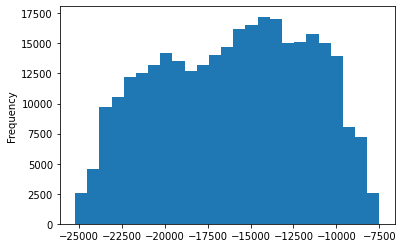

In [40]:
df.DAYS_BIRTH.plot.hist(bins=25)

Create a new dataframe with age and target

In [41]:
dfAge=df[['TARGET','DAYS_BIRTH']]

In [ ]:
dfAge.head()

,TARGET,DAYS_BIRTH
0,1,-9461
1,0,-16765
2,0,-19046
3,0,-19005
4,0,-19932


In [44]:
#age is relative to target and dependent on days. We can convert to years by diving by 365
dfAge['YEARS_BIRTH']=-dfAge['DAYS_BIRTH']/365

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
dfAge.head()

,TARGET,DAYS_BIRTH,YEARS_BIRTH,bins
0,1,-9461,25.920548,"(25.918, 31.318]"
1,0,-16765,45.931507,"(42.119, 47.519]"
2,0,-19046,52.180822,"(47.519, 52.92]"
3,0,-19005,52.068493,"(47.519, 52.92]"
4,0,-19932,54.608219,"(52.92, 58.32]"


In [ ]:
#We can group years into bins


In [45]:
dfAge['YEARS_BIRTH'].describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: YEARS_BIRTH, dtype: float64

In [ ]:
#min is 20 and max is 70, range of 50 yrs, we can create bin of 5 yrs 10 bins or 10 yrs 5 bins

In [46]:
bins = np.linspace(dfAge['YEARS_BIRTH'].min(), dfAge['YEARS_BIRTH'].max(), num = 10)
dfAge['bins'] = pd.cut(dfAge['YEARS_BIRTH'],bins=bins) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [47]:
dfAge.columns

Index(['TARGET', 'DAYS_BIRTH', 'YEARS_BIRTH', 'bins'], dtype='object')

In [49]:
age_perc = dfAge[['bins', 'TARGET']].groupby(['bins'],as_index=False).mean()
age_perc
#old people target mean is less than young people
#implying old people tend to pay their loan on time as compared to young people

,bins,TARGET
0,"(20.518, 25.918]",0.118044
1,"(25.918, 31.318]",0.111850
2,"(31.318, 36.719]",0.098964
3,"(36.719, 42.119]",0.084012
4,"(42.119, 47.519]",0.076695
5,"(47.519, 52.92]",0.070837
6,"(52.92, 58.32]",0.058869
7,"(58.32, 63.72]",0.053845
8,"(63.72, 69.121]",0.043100


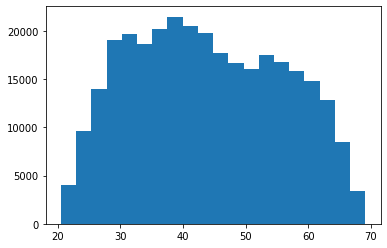

In [48]:
n,bins,patches=plt.hist(-df.DAYS_BIRTH/365,bins=20,histtype='bar')

Missing Values Analysis

In [17]:
num_missing_values=dummy_df.isnull().sum()
num_missing_values

TARGET                             0
NAME_CONTRACT_TYPE                 0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
                                  ..
NAME_TYPE_SUITE_Group of people    0
NAME_TYPE_SUITE_Other_A            0
NAME_TYPE_SUITE_Other_B            0
NAME_TYPE_SUITE_Spouse, partner    0
NAME_TYPE_SUITE_Unaccompanied      0
Length: 239, dtype: int64

In [56]:
missDF=pd.DataFrame(num_missing_values,columns=['numMissingValues'])


In [55]:
missDF[missDF.numMissingValues!=0]

,numMissingValues
AMT_ANNUITY,12
AMT_GOODS_PRICE,278
OWN_CAR_AGE,202929
CNT_FAM_MEMBERS,2
EXT_SOURCE_1,173378
...,...
AMT_REQ_CREDIT_BUREAU_DAY,41519
AMT_REQ_CREDIT_BUREAU_WEEK,41519
AMT_REQ_CREDIT_BUREAU_MON,41519
AMT_REQ_CREDIT_BUREAU_QRT,41519


Save Original Dataframe

In [ ]:
dfFull=df.copy(deep=True)
dfFull.head()

Remove Gender and SK_ID_CURR from evaluation as they dont play role

In [ ]:
df.drop('SK_ID_CURR', axis = 1, inplace = True)
df.drop('CODE_GENDER', axis = 1, inplace = True)

Change Categorical columns to Numerical columns

Change NAME_CONTRACT_TYPE to Numerical
Cash loans-1 as it is maximum valu of 278k 
and Revolving loans=0

In [ ]:
#change column with 2 categorical values to binary
df['NAME_CONTRACT_TYPE'].replace(['Cash loans', 'Revolving loans'],[1, 0], inplace=True)
df['FLAG_OWN_CAR'].replace(['Y', 'N'],[1, 0], inplace=True)
df['FLAG_OWN_REALTY'].replace(['Y', 'N'],[1, 0], inplace=True)

In [ ]:
#Get Numerical Columns
num_cols = df._get_numeric_data().columns
num_cols

In [ ]:
#Get Categorical columns
cat_cols=list(set(df.columns) - set(num_cols)) 
cat_cols

In [ ]:
# Change columns ith more categorical values to one hot encoding
#Number of columns increased from 118 (after removing id and gender)to 239
dummy_df=pd.get_dummies(df,columns=cat_cols)
dummy_df.shape

In [ ]:
dummy_df.head()

Fill Missing Values with Median

In [18]:
full_df = dummy_df.fillna(dummy_df.median())


In [19]:
full_df.head()

,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied
0,1,1,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,0,0,1,0,0,0,0,0,0,1
1,0,1,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,0,0,0,0,1,0,0,0,0,0
2,0,0,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,0,0,1,0,0,0,0,0,0,1
4,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,1,0,0,0,0,0,0,0,0,1


Scale Features to 0,1

In [19]:
X = full_df.drop('TARGET', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, full_df['TARGET'], test_size=0.25, random_state=42)
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [37]:
grouper = full_df.groupby("TARGET")
sizes = grouper.size()
sizes

TARGET
0    282686
1     24825
dtype: int64

People who dont default are more, so balance out

In [39]:
fracs = (sizes.min() * 0.85) / sizes
test  = pd.DataFrame()
train = pd.DataFrame()
for grp, data in grouper:
    mask = np.random.binomial(1, fracs.loc[grp], data.shape[0]).astype(bool)
    train = train.append(data[mask])

    test  =  test.append(data[~mask])

In [40]:
XB_train = train.drop('TARGET', axis=1)
XB_test=test.drop('TARGET', axis=1)
yB_train=train['TARGET']
yB_test=test['TARGET']
ss = StandardScaler()
XB_train_scaled = ss.fit_transform(XB_train)
XB_test_scaled = ss.transform(XB_test)

In [41]:
train.groupby("TARGET").size()


TARGET
0    21061
1    21084
dtype: int64

In [42]:
# Make the model with the specified regularization parameter
modelLR_Balanced = LogisticRegression()

# Train on the training data
modelLR_Balanced.fit(XB_train_scaled, yB_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [43]:
importances = pd.DataFrame(data={
    'Attribute': XB_train.columns,
    'Importance': modelLR_Balanced.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

In [44]:
importances
#Days Employed, Amt Credit, Amt goods price, NAME_INCOME_TYPE_Pensioner	 have high importance

,Attribute,Importance
10,DAYS_EMPLOYED,1.794480
5,AMT_CREDIT,0.911423
76,OBS_30_CNT_SOCIAL_CIRCLE,0.636391
62,BASEMENTAREA_MEDI,0.446912
237,NAME_INCOME_TYPE_Working,0.313304
...,...,...
32,EXT_SOURCE_3,-0.510117
174,ORGANIZATION_TYPE_XNA,-0.535702
78,OBS_60_CNT_SOCIAL_CIRCLE,-0.628575
233,NAME_INCOME_TYPE_Pensioner,-0.773594


In [45]:
predLR = modelLR_Balanced	.predict_proba(XB_test_scaled)[:, 1]
y_pred = [1 if p >= 0.5 else 0 for p in predLR]
accuracy_score(yB_test, y_pred)

0.6849144200839595

Accuracy Analysis

In [ ]:
#PPV = 100xTP/(TP+FP)
#NPV =100xTN/(FN+TN)
#TPR = TP / (FN+TP)
#FPR = FP / (TN+FP)
def findings(y_test,y_pred):
  tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel() 
  skplt.metrics.plot_confusion_matrix(y_test, y_pred,figsize=(8,8))
  ppv=100*tp/(tp+fp)
  npv =100*tn/(fn+tn)
  tpr=tp/(fn+tp)
  fpr=fp/(tn+fp)
  return(ppv,npv,tpr,fpr)


(2.976639035418237, 99.32774692692227, 0.6757551456829725, 0.31495461060678454)

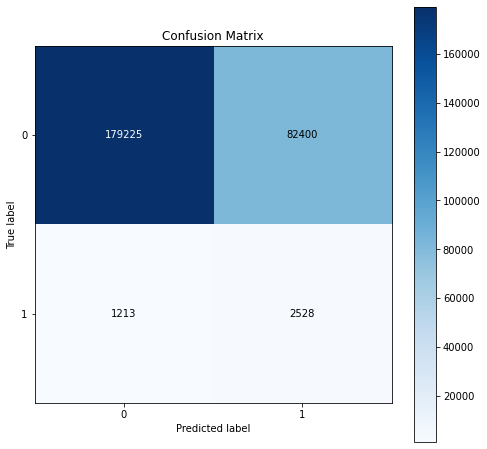

In [47]:
findings(yB_test,y_pred)

In [48]:
dfFull_test=dfFull.loc[test.index]

Gender Analysis on Evaluation

In [35]:
def Gender_Analysis(test,y_pred):
  dfFull_test=dfFull.loc[test.index]
  dfFull_test=dfFull_test.assign(pred=y_pred)
  dfFull_test.CODE_GENDER.value_counts()
  MaleDF=dfFull_test[dfFull_test['CODE_GENDER']=='M']
  FemaleDF=dfFull_test[dfFull_test['CODE_GENDER']=='F']
  return (findings(MaleDF['TARGET'],MaleDF['pred']),findings(FemaleDF['TARGET'],FemaleDF['pred']))

In [51]:
# gender_perc = dfFull_test[['CODE_GENDER', 'TARGET','pred']].groupby(['CODE_GENDER'],as_index=False).mean()
# gender_perc

((3.4486841715757377,
  99.1931682198934,
  0.7236024844720497,
  0.37350128829086743),
 (2.665024245268262, 99.38698785948613, 0.639605818864383, 0.2856118327442971))

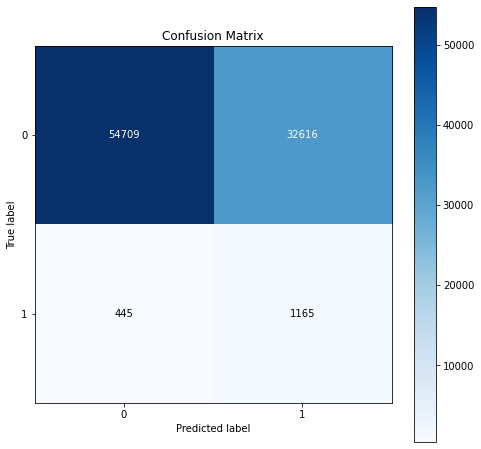

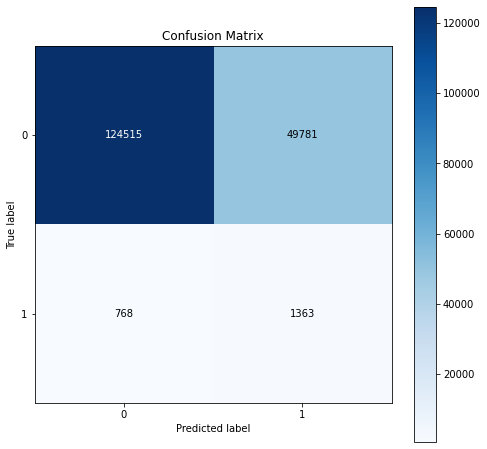

In [50]:
Gender_Analysis(test,y_pred)

(2.940384007122524, 99.30774525913755, 0.668086239020495, 0.3165445362226926)

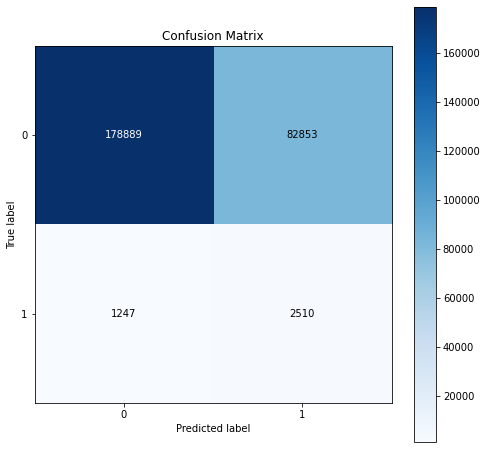

In [96]:
findings(yB_test,y_pred)

In [97]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(modelLR_Balanced, XB_train_scaled, yB_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.677 (0.002)


In [99]:
X = full_df.drop('TARGET', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, full_df['TARGET'], test_size=0.25, random_state=42)
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [ ]:
dfFull 

Logistic Regression Model

In [21]:

# Make the model with the specified regularization parameter
modelLR = LogisticRegression()

# Train on the training data
modelLR.fit(X_train_scaled, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

Get Feature Importance

In [23]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': modelLR.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

In [24]:
importances

,Attribute,Importance
10,DAYS_EMPLOYED,2.028713
5,AMT_CREDIT,0.897825
36,YEARS_BUILD_AVG,0.512333
76,OBS_30_CNT_SOCIAL_CIRCLE,0.470488
69,FLOORSMIN_MEDI,0.392164
...,...,...
78,OBS_60_CNT_SOCIAL_CIRCLE,-0.481253
65,COMMONAREA_MEDI,-0.531067
174,ORGANIZATION_TYPE_XNA,-0.614981
233,NAME_INCOME_TYPE_Pensioner,-0.723977


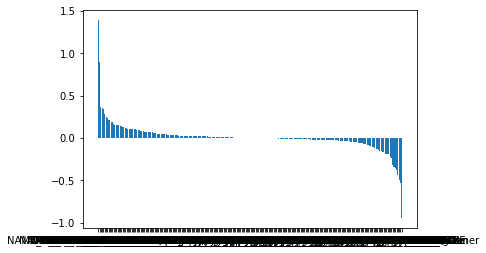

In [72]:
plt.bar(x=importances['Attribute'], height=importances['Importance'])
# plt.title('Feature importances obtained from coefficients'
# plt.xticks(rotation='vertical')
plt.show()

In [25]:
predLR = modelLR.predict_proba(X_test_scaled)[:, 1]
y_pred = [1 if p >= 0.5 else 0 for p in predLR]
accuracy_score(y_test, y_pred)

0.9193657483285205

Gender Analysis

((41.1764705882353,
  89.9700023075148,
  0.01324252743094968,
  0.0021327418529261217),
 (54.666666666666664,
  93.08488612836439,
  0.011555806087936866,
  0.0007196985733034164))

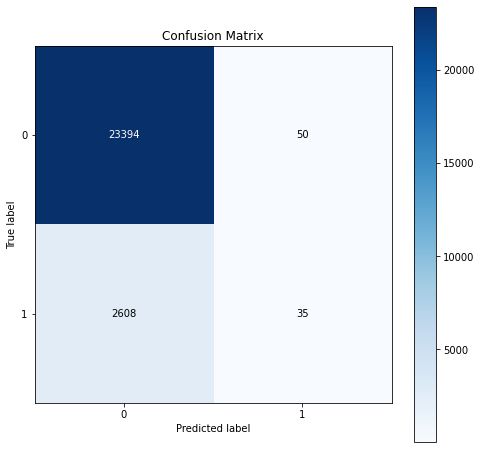

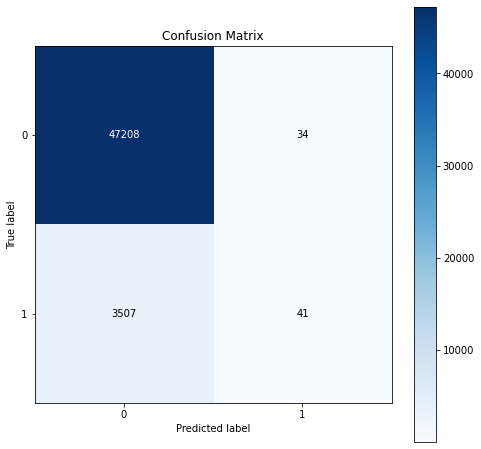

In [36]:
Gender_Analysis(X_test,y_pred)

K Fold Cross Validation

In [79]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(modelLR, XB_train_scaled, yB_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.676 (0.004)


In [82]:

tn, fp, fn, tp = confusion_matrix(yB_test, y_pred).ravel()


In [83]:
tn, fp, fn, tp

(3575, 1713, 1631, 3584)

(67.6609401548046, 68.67076450249712, 0.687248322147651, 0.3239409984871407)

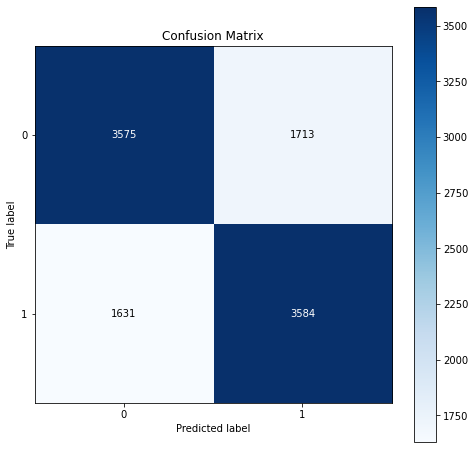

In [85]:
findings(yB_test,y_pred)

In [ ]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': modelLR.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

Random Forest

In [52]:

modelRF = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [53]:
modelRF.fit(X_train_scaled,y_train )

feature_importance_values = modelRF.feature_importances_
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': feature_importance_values})



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   58.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.9min finished


In [54]:
feature_importances = feature_importances.sort_values(by='importance', ascending=False)
feature_importances.head()

,feature,importance
31,EXT_SOURCE_2,0.050519
32,EXT_SOURCE_3,0.049065
9,DAYS_BIRTH,0.034076
12,DAYS_ID_PUBLISH,0.033613
11,DAYS_REGISTRATION,0.032598


In [55]:
feature_importances.tail()

,feature,importance
91,FLAG_DOCUMENT_12,0.0
230,NAME_INCOME_TYPE_Businessman,0.0
14,FLAG_MOBIL,0.0
221,NAME_FAMILY_STATUS_Unknown,0.0
89,FLAG_DOCUMENT_10,0.0


In [56]:
# Make predictions on the test data
predRF = modelRF.predict_proba(X_test_scaled)[:, 1]

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    2.6s finished


In [57]:
y_pred = [1 if p >= 0.5 else 0 for p in predRF]
accuracy_score(y_test, y_pred)

0.9196519160227894

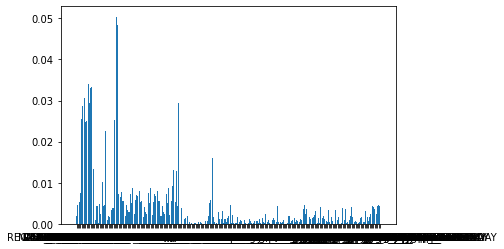

In [ ]:
plt.bar(x=feature_importances['feature'], height=feature_importances['importance'])
# plt.title('Feature importances obtained from coefficients'
# plt.xticks(rotation='vertical')
plt.show()

(85.0, 91.9670040854563, 0.002745921498950089, 4.244061850128029e-05)

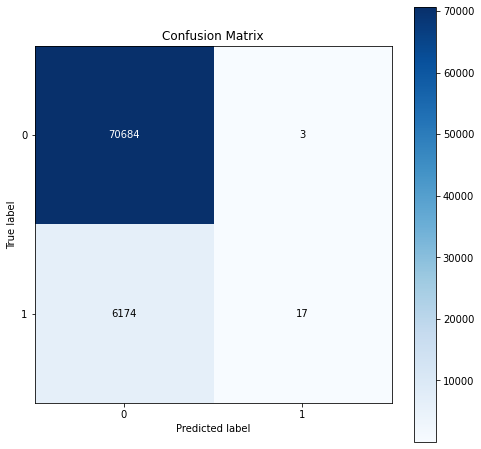

In [59]:
findings(y_test,y_pred)


((75.0, 89.8884159668699, 0.0022701475595913734, 8.530967411704488e-05),
 (91.66666666666667,
  93.03438496986884,
  0.0031003382187147687,
  2.1167605097159308e-05))

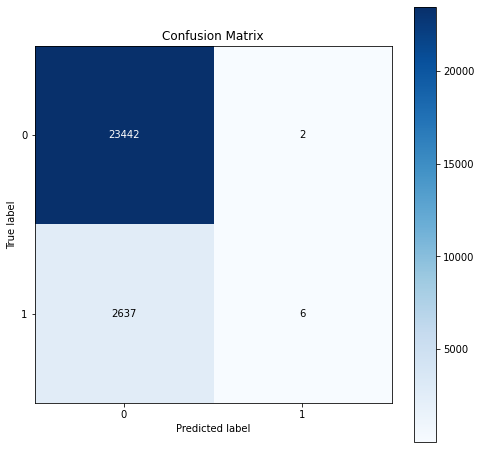

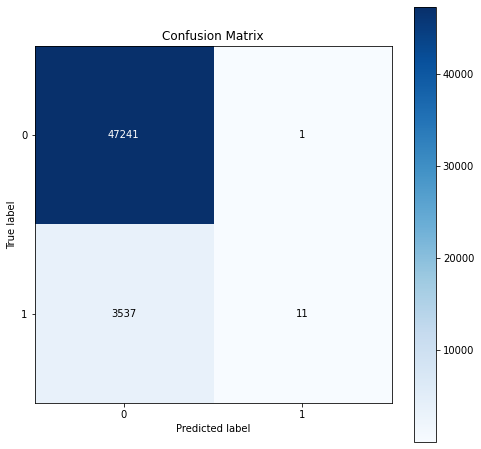

In [60]:
Gender_Analysis(X_test,y_pred)

In [ ]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(modelRF, X_train_scaled, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.919 (0.002)
